# 9. 심층신경망
Deep Neural Networks

## 실습9.6 Deep Regression
### 1. 데이터 준비

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['TARGET'] = boston.target

/Users/limkahyun/opt/anaconda3/envs/sona/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

In [3]:
scaler = StandardScaler()
scaler.fit(df.values[:, :-1])
df.values[:, :-1] = scaler.transform(df.values[:, :-1]).round(4)
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,-0.4132,-0.4877,0.1157,-0.2726,0.1581,0.4393,0.0187,-0.6258,-0.9828,-0.8032,1.1765,0.3872,-0.4181,22.4
502,-0.4152,-0.4877,0.1157,-0.2726,0.1581,-0.2345,0.2889,-0.7166,-0.9828,-0.8032,1.1765,0.4411,-0.5008,20.6
503,-0.4134,-0.4877,0.1157,-0.2726,0.1581,0.9850,0.7974,-0.7737,-0.9828,-0.8032,1.1765,0.4411,-0.9830,23.9
504,-0.4078,-0.4877,0.1157,-0.2726,0.1581,0.7257,0.7370,-0.6684,-0.9828,-0.8032,1.1765,0.4032,-0.8653,22.0
505,-0.4150,-0.4877,0.1157,-0.2726,0.1581,-0.3628,0.4347,-0.6132,-0.9828,-0.8032,1.1765,0.4411,-0.6691,11.9


### 2. 학습 코드 구현

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [5]:
data = torch.from_numpy(df.values).float()

In [13]:
x = data[:, :-1]
y = data[:, -1:]
print(x.shape, y.shape)

torch.Size([506, 13]) torch.Size([506, 1])


In [14]:
# 학습에 필요한 값 설정
n_epochs = 200000
lr = 1e-4
print_interval = 10000

In [15]:
# 모델 생성
class MyModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim
        
        super().__init__()
        
        self.linear1 = nn.Linear(input_dim, 3)
        self.linear2 = nn.Linear(3, 3)
        self.linear3 = nn.Linear(3, 3)
        self.linear4 = nn.Linear(3, output_dim)
        self.act = nn.ReLU()
        
    def forward(self, x):
        h = self.act(self.linear1(x))
        h = self.act(self.linear2(h))
        h = self.act(self.linear3(h))
        y = self.linear4(h)
        return y

In [16]:
model = MyModel(x.size(-1), y.size(-1))
model

MyModel(
  (linear1): Linear(in_features=13, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=3, bias=True)
  (linear3): Linear(in_features=3, out_features=3, bias=True)
  (linear4): Linear(in_features=3, out_features=1, bias=True)
  (act): ReLU()
)

In [18]:
# 또는 Model 직접 입력
model = nn.Sequential(nn.Linear(x.size(-1), 3),
                      nn.LeakyReLU(),
                      nn.Linear(3, 3),
                      nn.LeakyReLU(),
                      nn.Linear(3, 3),
                      nn.LeakyReLU(),
                      nn.Linear(3, y.size(-1))
                     )
model

Sequential(
  (0): Linear(in_features=13, out_features=3, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=3, out_features=3, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=3, out_features=3, bias=True)
  (5): LeakyReLU(negative_slope=0.01)
  (6): Linear(in_features=3, out_features=1, bias=True)
)

In [19]:
optimizer = optim.SGD(model.parameters(), lr=lr)

In [20]:
for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (i+1) % print_interval == 0:
        print(f'Epoch {i+1}: loss={loss:.4e}')

Epoch 10000: loss=1.0339e+01
Epoch 20000: loss=9.9450e+00
Epoch 30000: loss=9.8461e+00
Epoch 40000: loss=9.8239e+00
Epoch 50000: loss=9.8191e+00
Epoch 60000: loss=9.8146e+00
Epoch 70000: loss=9.8069e+00
Epoch 80000: loss=9.7377e+00
Epoch 90000: loss=9.5423e+00
Epoch 100000: loss=9.5169e+00
Epoch 110000: loss=9.5112e+00
Epoch 120000: loss=9.5085e+00
Epoch 130000: loss=9.5068e+00
Epoch 140000: loss=9.5056e+00
Epoch 150000: loss=9.5019e+00
Epoch 160000: loss=9.4993e+00
Epoch 170000: loss=9.4891e+00
Epoch 180000: loss=9.4860e+00
Epoch 190000: loss=9.4841e+00
Epoch 200000: loss=9.4822e+00


### 3. 결과 확인

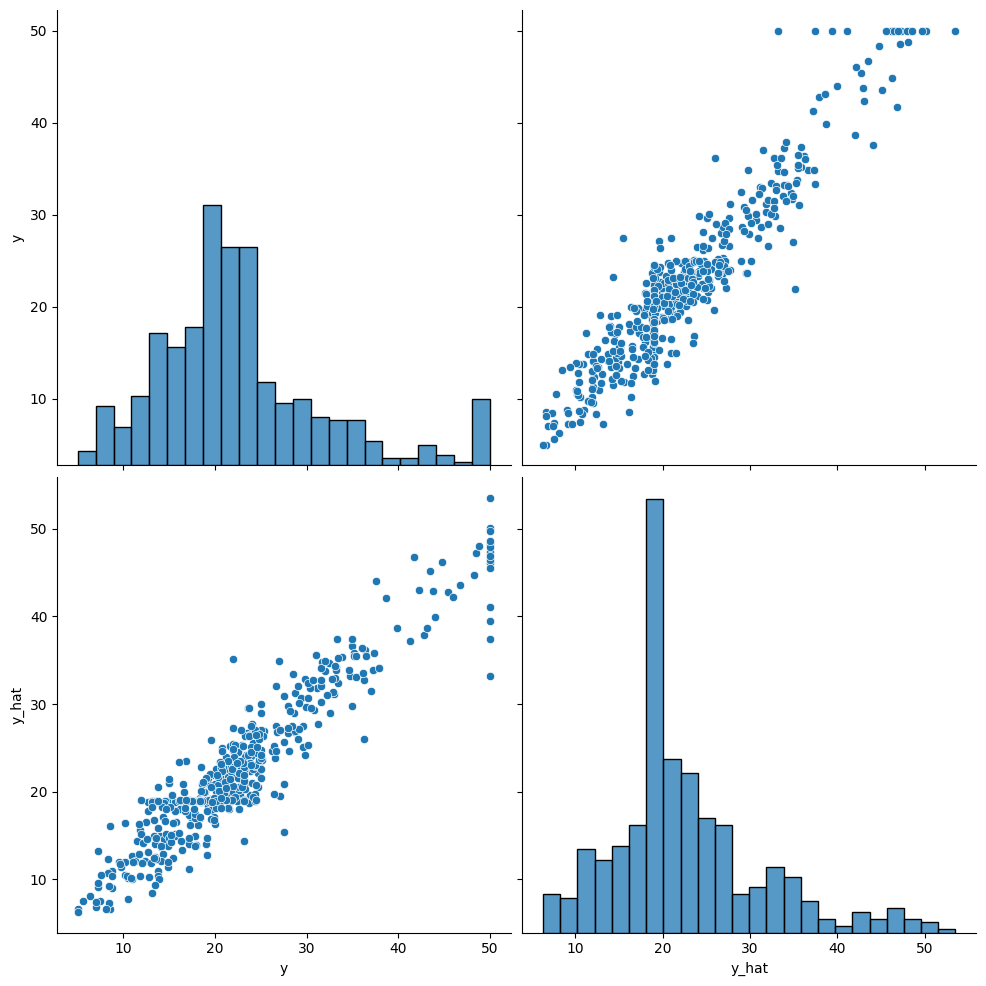

In [21]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(), columns=['y', 'y_hat'])
sns.pairplot(df, height=5)